In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
def imshow(img, title=None):
    img = img / 2 + 0.5  # денормализация
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title:
        plt.title(title)
    plt.show()


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразует изображения в тензоры
    transforms.Normalize((0.5,), (0.5,))  # Нормализует изображения (среднее значение и стандартное отклонение)
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)  # Загружает тренировочный датасет с применением трансформаций
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)  # Загружает тестовый датасет с применением трансформаций

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Создает DataLoader для тренировки
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # Создает DataLoader для тестирования



TypeError: MNIST.__init__() got an unexpected keyword argument 'random_state'

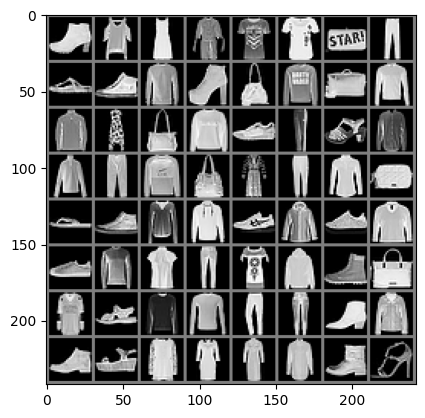

9 6 3 3 0 0 8 1


In [ ]:
# Получаем несколько случайных изображений из тренировочного набора
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Показываем изображения
imshow(torchvision.utils.make_grid(images))
# Выводим истинные метки
print(' '.join(f'{labels[j]}' for j in range(8)))

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # Первый сверточный слой
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Второй сверточный слой
        self.pool = nn.MaxPool2d(2, 2)  # Максимальный пуллинг
        self.dropout = nn.Dropout(0.25)  # Слой Dropout для регуляризации
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Первый полносвязный слой
        self.fc2 = nn.Linear(128, 10)  # Выходной полносвязный слой

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Применение первого сверточного слоя, активации ReLU и пуллинга
        x = self.pool(F.relu(self.conv2(x)))  # Применение второго сверточного слоя, активации ReLU и пуллинга
        x = x.view(-1, 64 * 7 * 7)  # Преобразование тензора для подачи в полносвязный слой
        x = self.dropout(x)  # Применение Dropout
        x = F.relu(self.fc1(x))  # Применение первого полносвязного слоя и активации ReLU
        x = self.fc2(x)  # Применение выходного полносвязного слоя
        return x

model = CNN()  # Создание экземпляра модели



In [ ]:
from torch.utils.data import DataLoader

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total}%")

train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)


Epoch 1, Loss: 0.43893496252135683
Epoch 2, Loss: 0.2969947381933996
Epoch 3, Loss: 0.2512943705103036
Epoch 4, Loss: 0.22406741982298112
Epoch 5, Loss: 0.2008303281849127
Epoch 6, Loss: 0.1829712405276578
Epoch 7, Loss: 0.16881070004653004
Epoch 8, Loss: 0.1517506232802897
Epoch 9, Loss: 0.1397394196116435
Epoch 10, Loss: 0.12760009944065612
Accuracy: 92.2%


In [ ]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Функция обучения модели
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Функция оценки модели с визуализацией результатов
def evaluate_model(model, test_loader, classes):
    model.eval()
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels)
            all_preds.extend(predicted)
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy}%")

    # Визуализация нескольких изображений с предсказаниями
    dataiter = iter(test_loader)
    images, labels = dataiter.next()
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Показываем изображения
    imshow(torchvision.utils.make_grid(images[:8]))
    # Выводим истинные метки и предсказания
    print('True labels:    ' + ' '.join(f'{classes[labels[j]]}' for j in range(8)))
    print('Predicted: ' + ' '.join(f'{classes[predicted[j]]}' for j in range(8)))

# Создание модели
model = CNN()

# Обучение модели
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# Список классов FashionMNIST
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Оценка модели
evaluate_model(model, test_loader, classes)


In [ ]:
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

improved_model = ImprovedCNN()
optimizer = optim.Adam(improved_model.parameters(), lr=0.001)
train_model(improved_model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(improved_model, test_loader)


Epoch 1, Loss: 0.5096759407092005
Epoch 2, Loss: 0.3290544861018149
Epoch 3, Loss: 0.28192856980126296
Epoch 4, Loss: 0.25212040164672744
Epoch 5, Loss: 0.23430307401713532
Epoch 6, Loss: 0.2189112666771928
Epoch 7, Loss: 0.20310122713144782
Epoch 8, Loss: 0.19323626993450402
Epoch 9, Loss: 0.18082052636454735
Epoch 10, Loss: 0.17636515650310433
Accuracy: 92.36%
